In [2]:
!pip install pandas
!pip install matplotlib

  Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp39-cp39-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached importlib_resources-6.4.5-py3-none-any.whl.metadata (4.0 kB)
Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl (211 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp39-cp39-win_amd64.whl (2.2 MB)
Using cached importlib_resources-6.4.5-py3-none-any.whl (36 kB)
Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl (55 kB)
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 21.0 MB/s eta 0:00:00


In [6]:
import pandas as pd

# Load datasets
booking_data = pd.read_csv('bookingStock.csv')
airbnb_data = pd.read_csv('airbnbStockv2.csv', sep=';', header=1)

# Step 1: Clean Booking Data
# Remove dollar signs and convert to float
for column in ['Close/Last', 'Open', 'High', 'Low']:
    booking_data[column] = booking_data[column].replace('[\$,]', '', regex=True).astype(float)

# Convert Date to datetime format
booking_data['Date'] = pd.to_datetime(booking_data['Date'])

# Save cleaned Booking data to CSV
booking_data.to_csv('Cleaned_Booking.csv', index=False)

# Step 2: Clean Airbnb Data
# Rename columns for Airbnb data after splitting
airbnb_data.columns = ['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']

# Remove dollar signs and convert to float
for column in ['Close/Last', 'Open', 'High', 'Low']:
    airbnb_data[column] = airbnb_data[column].replace('[\$,]', '', regex=True).astype(float)

# Convert Date to datetime format
airbnb_data['Date'] = pd.to_datetime(airbnb_data['Date'])

# Save cleaned Airbnb data to CSV
airbnb_data.to_csv('Cleaned_Airbnb.csv', index=False)

print("Data cleaned and saved to Cleaned_Booking.csv and Cleaned_Airbnb.csv")

Data cleaned and saved to Cleaned_Booking.csv and Cleaned_Airbnb.csv


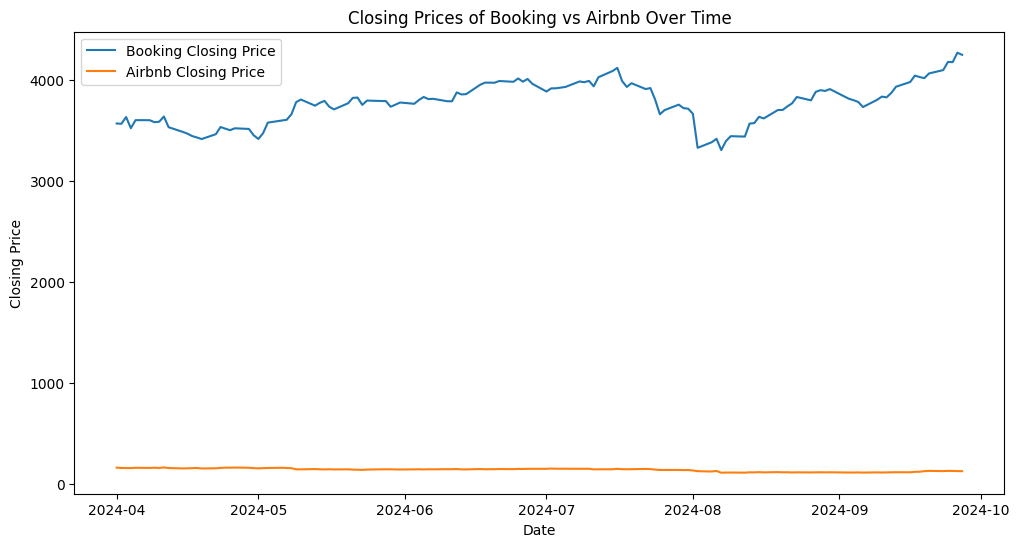

Booking Stock Statistics:
count     126.000000
mean     3765.997143
std       208.535589
min      3305.620000
25%      3601.352500
50%      3788.710000
75%      3918.622500
max      4268.940000
Name: Close/Last, dtype: float64

Airbnb Stock Statistics:
count    126.000000
mean     141.259603
std       16.119924
min      113.010000
25%      128.235000
50%      146.635000
75%      152.327500
max      165.420000
Name: Close/Last, dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned datasets
booking_data = pd.read_csv('Cleaned_Booking.csv')
airbnb_data = pd.read_csv('Cleaned_Airbnb.csv')

# Convert Date columns to datetime (if not already)
booking_data['Date'] = pd.to_datetime(booking_data['Date'])
airbnb_data['Date'] = pd.to_datetime(airbnb_data['Date'])

# Step 1: Plotting closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(booking_data['Date'], booking_data['Close/Last'], label='Booking Closing Price')
plt.plot(airbnb_data['Date'], airbnb_data['Close/Last'], label='Airbnb Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices of Booking vs Airbnb Over Time')
plt.legend()
plt.show()

# Step 2: Basic Statistics
booking_stats = booking_data['Close/Last'].describe()
airbnb_stats = airbnb_data['Close/Last'].describe()

# Display basic statistics for both stocks
print("Booking Stock Statistics:")
print(booking_stats)
print("\nAirbnb Stock Statistics:")
print(airbnb_stats)